<a href="https://colab.research.google.com/github/PREMJADHAV1597/ds.Prem_Jadhav/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", palette="muted")

In [ ]:
# 2. Load Datasets

fear_greed = pd.read_csv("/fear_greed_index.csv")
trader_data = pd.read_csv("/historical_data.csv")


In [ ]:
# 3. Clean & Prepare Data

# Fear & Greed Index
fear_greed["date"] = pd.to_datetime(fear_greed["date"], errors="coerce")

# Trader Data
trader_data["Timestamp IST"] = pd.to_datetime(trader_data["Timestamp IST"], format="%d-%m-%Y %H:%M", errors="coerce")
trader_data["date_only"] = trader_data["Timestamp IST"].dt.date
trader_data["date_only"] = pd.to_datetime(trader_data["date_only"])

In [ ]:
# 4. Merge Both Datasets

merged = pd.merge(
    trader_data,
    fear_greed[["date", "classification", "value"]],
    left_on="date_only",
    right_on="date",
    how="inner"
)

print("Merged shape:", merged.shape)
print(merged.head())


Merged shape: (211218, 20)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash 

/tmp/ipython-input-2418597843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")


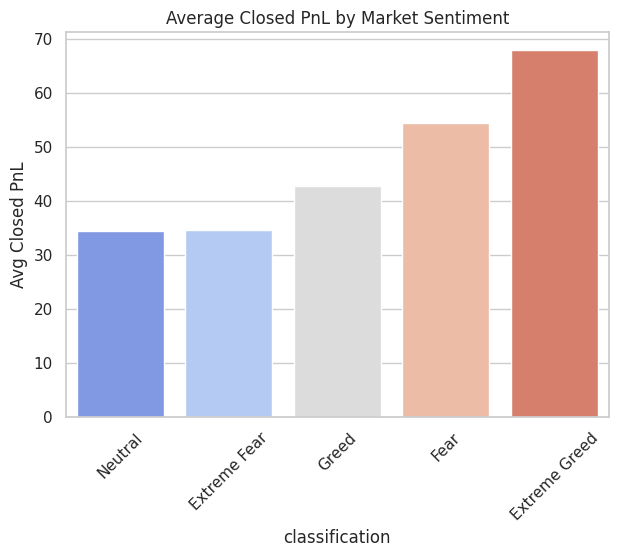

In [ ]:
# Make sure folders exist
import os
os.makedirs("outputs", exist_ok=True)

# Profitability Analysis
avg_pnl = merged.groupby("classification")["Closed PnL"].mean().sort_values()

plt.figure(figsize=(7,5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xticks(rotation=45)
plt.savefig("outputs/pnl_by_sentiment.png")  # Now works fine
plt.show()


/tmp/ipython-input-2573505974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette="viridis")


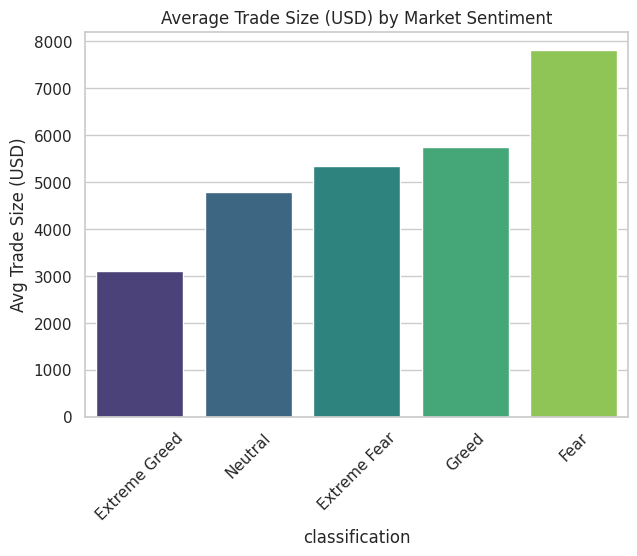

In [ ]:
# 6. Volume Analysis

avg_size = merged.groupby("classification")["Size USD"].mean().sort_values()

plt.figure(figsize=(7,5))
sns.barplot(x=avg_size.index, y=avg_size.values, palette="viridis")
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.ylabel("Avg Trade Size (USD)")
plt.xticks(rotation=45)
plt.savefig("outputs/trade_size_by_sentiment.png")
plt.show()

/tmp/ipython-input-1763686077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_freq.index, y=trade_freq.values, palette="crest")


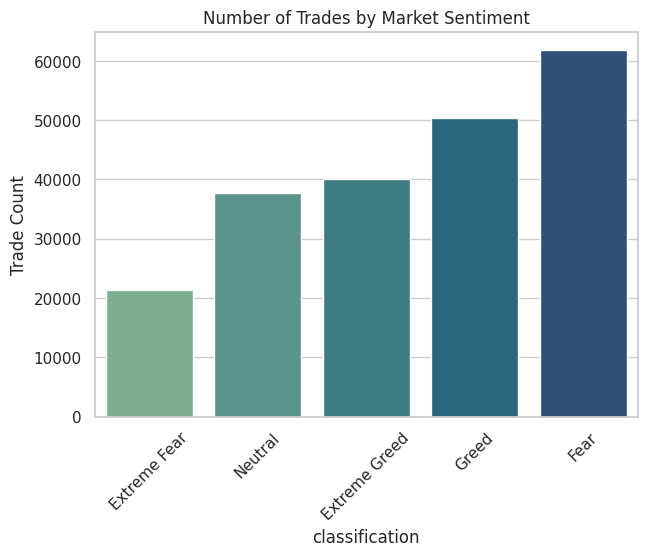

In [ ]:
# 7. Risk Metrics


# 7.1 Trade Frequency (number of trades per sentiment)
trade_freq = merged.groupby("classification")["Trade ID"].count().sort_values()

plt.figure(figsize=(7,5))
sns.barplot(x=trade_freq.index, y=trade_freq.values, palette="crest")
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.savefig("outputs/trade_count_by_sentiment.png")
plt.show()


/tmp/ipython-input-2057522833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_volatility.index, y=pnl_volatility.values, palette="mako")


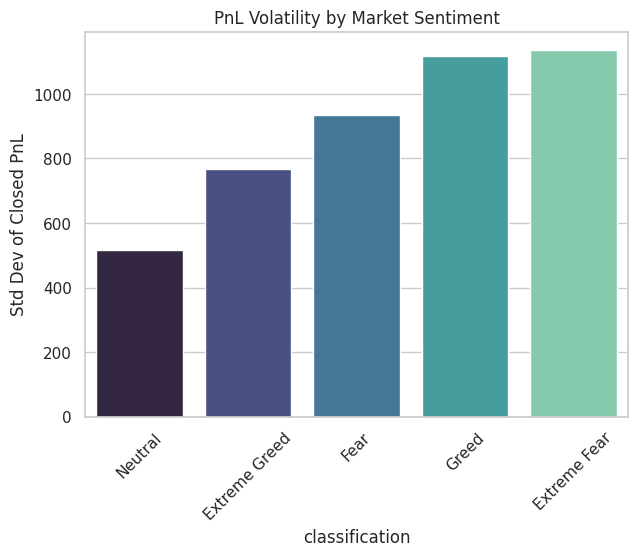

In [ ]:
# 7.2 PnL Volatility (risk)
pnl_volatility = merged.groupby("classification")["Closed PnL"].std().sort_values()

plt.figure(figsize=(7,5))
sns.barplot(x=pnl_volatility.index, y=pnl_volatility.values, palette="mako")
plt.title("PnL Volatility by Market Sentiment")
plt.ylabel("Std Dev of Closed PnL")
plt.xticks(rotation=45)
plt.savefig("outputs/pnl_volatility_by_sentiment.png")
plt.show()


/tmp/ipython-input-1921941465.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_leverage.index, y=avg_leverage.values, palette="flare")


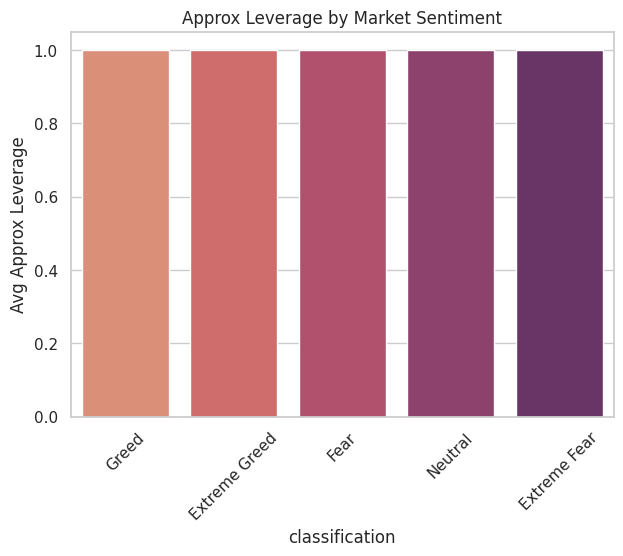

In [ ]:
# 7.3 Approximate Leverage (Size USD / Execution Price * Size Tokens)
# -> Not exact leverage, but proxy for capital efficiency
merged["Approx Leverage"] = merged["Size USD"] / (merged["Execution Price"] * merged["Size Tokens"] + 1e-9)

avg_leverage = merged.groupby("classification")["Approx Leverage"].mean().sort_values()

plt.figure(figsize=(7,5))
sns.barplot(x=avg_leverage.index, y=avg_leverage.values, palette="flare")
plt.title("Approx Leverage by Market Sentiment")
plt.ylabel("Avg Approx Leverage")
plt.xticks(rotation=45)
plt.savefig("outputs/leverage_by_sentiment.png")
plt.show()

In [ ]:
# 8. Save Processed Data

merged.to_csv("/merged_trader_sentiment.csv", index=False)
print("\nProcessed merged dataset saved at: csv_files/merged_trader_sentiment.csv")


Processed merged dataset saved at: csv_files/merged_trader_sentiment.csv
